### Importando Biblioitecas

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Carregando o dataset

In [19]:
df = pd.read_csv('movie_metadata.csv')

### Visualizar as primeiras linhas do dataset


In [20]:
print(df.head())


   color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1               

### Informações gerais do dataset (tipos de dados, colunas, valores nulos, etc.)

In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

### Estatisticas descritivas das colunas

In [22]:
print(df.describe())

       num_critic_for_reviews     duration  director_facebook_likes  \
count             4993.000000  5028.000000              4939.000000   
mean               140.194272   107.201074               686.509212   
std                121.601675    25.197441              2813.328607   
min                  1.000000     7.000000                 0.000000   
25%                 50.000000    93.000000                 7.000000   
50%                110.000000   103.000000                49.000000   
75%                195.000000   118.000000               194.500000   
max                813.000000   511.000000             23000.000000   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count             5020.000000             5036.000000  4.159000e+03   
mean               645.009761             6560.047061  4.846841e+07   
std               1665.041728            15020.759120  6.845299e+07   
min                  0.000000                0.000000  1.620000e+02   
25%  

### Removendo colunas irrelevantes

In [23]:
df = df.drop(['movie_imdb_link', 'actor_1_facebook_likes', 
              'actor_2_facebook_likes', 'actor_3_facebook_likes', 
              'cast_total_facebook_likes', 'movie_facebook_likes'], axis=1)

### Tratando dados faltantes (exemplo: remover linhas com valores ausentes em 'gross')

In [24]:
df.dropna(subset=['gross'], inplace=True)

### Histograma da Pontuação IMDB

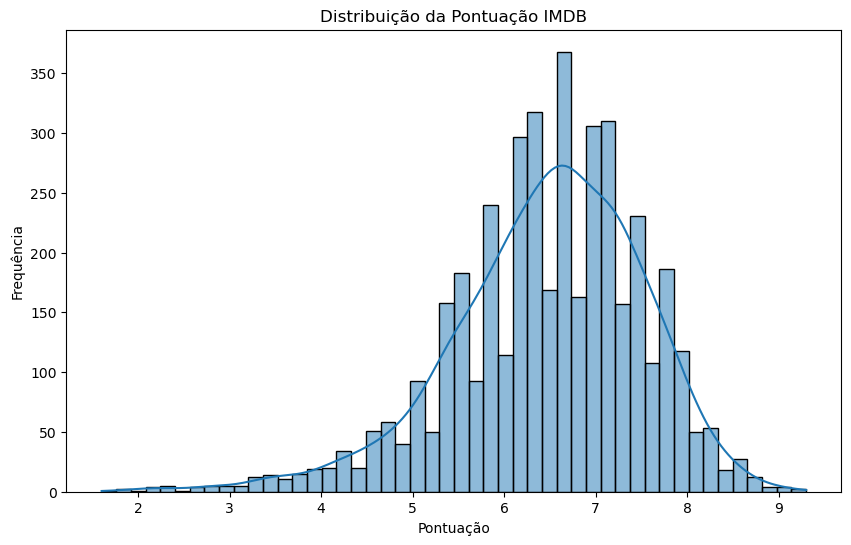

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df['imdb_score'], kde=True)
plt.title('Distribuição da Pontuação IMDB')
plt.xlabel('Pontuação')
plt.ylabel('Frequência')
plt.show()

### Correlação entre Orçamento e Receita Bruta (Gross)


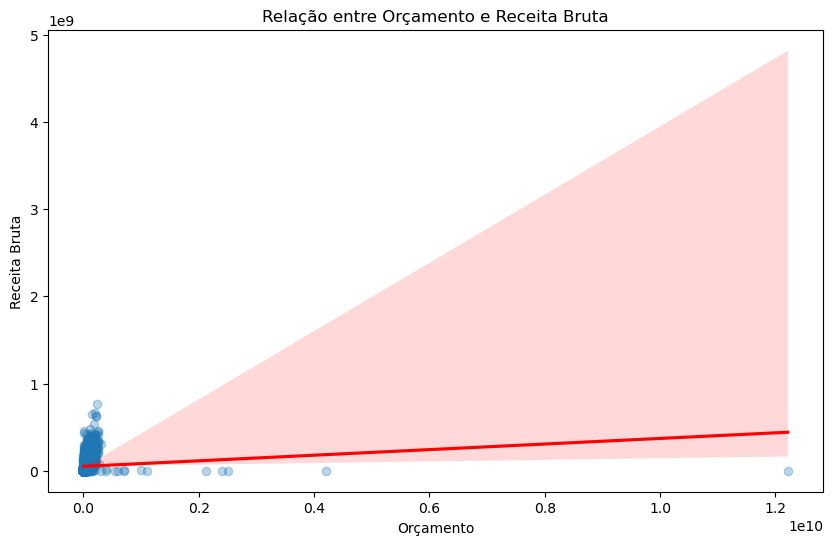

In [26]:
plt.figure(figsize=(10, 6))
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'alpha':0.3}, line_kws={"color": "red"})
plt.title('Relação entre Orçamento e Receita Bruta')
plt.xlabel('Orçamento')
plt.ylabel('Receita Bruta')
plt.show()

### Distribuição dos Gêneros Cinematográficos

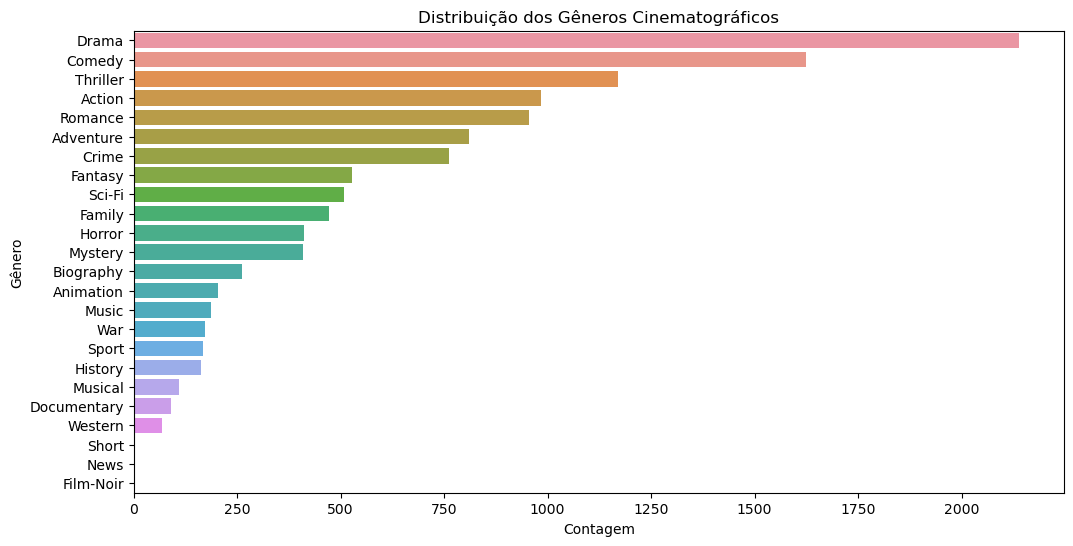

In [27]:
# Separar os gêneros (os gêneros estão separados por "|")
df['genres'] = df['genres'].str.split('|')

# Explodir os gêneros para que cada um seja uma linha
df_genres = df.explode('genres')

# Gráfico de barras mostrando a contagem de cada gênero
plt.figure(figsize=(12, 6))
sns.countplot(y='genres', data=df_genres, order=df_genres['genres'].value_counts().index)
plt.title('Distribuição dos Gêneros Cinematográficos')
plt.xlabel('Contagem')
plt.ylabel('Gênero')
plt.show()

### Evolução do Número de Filmes ao Longo dos Anos

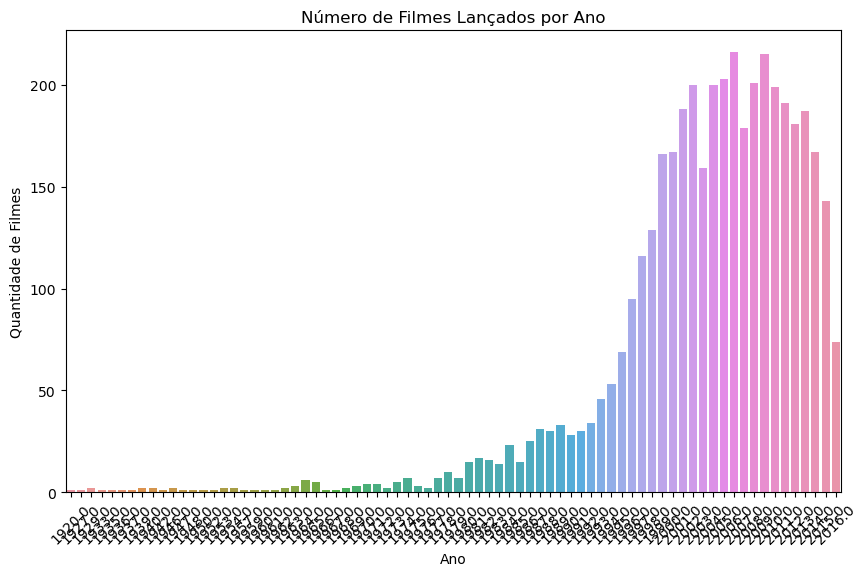

In [28]:
# Gráfico de linha mostrando a quantidade de filmes lançados por ano
plt.figure(figsize=(10, 6))
sns.countplot(x='title_year', data=df, order=df['title_year'].value_counts().index.sort_values())
plt.title('Número de Filmes Lançados por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Filmes')
plt.xticks(rotation=45)
plt.show()